In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

## **LOADING AUDIO DATA**

In [ ]:
classical_wav = "/content/drive/MyDrive/Librosa-Github/classical.00024.wav"
hiphop_wav = "/content/drive/MyDrive/Librosa-Github/hiphop.00024.wav"
metal_wav = "/content/drive/MyDrive/Librosa-Github/metal.00024.wav"

In [ ]:
# load audio files with librosa
classical, sr = librosa.load(classical_wav)
hiphop, _ = librosa.load(hiphop_wav)
metal, _ = librosa.load(metal_wav)

### DISPLAY AUDIO

In [ ]:
ipd.Audio(classical_wav)

In [ ]:
ipd.Audio(hiphop_wav)

In [ ]:
ipd.Audio(metal_wav)

###**STFT TRANSFORM**

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display a spectrogram.

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [ ]:
S_classical = librosa.stft(classical, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [ ]:
S_classical.shape

(1025, 1293)

In [ ]:
type(S_classical[0][0])

numpy.complex64

###**SPECTOGRAMS**

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.  Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.  In other sciences spectrograms are commonly used to display frequencies of sound waves produced by humans, machinery, animals, whales, jets, etc., as recorded by microphones.  In the seismic world, spectrograms are increasingly being used to look at frequency content of continuous signals recorded by individual or groups of seismometers to help distinguish and characterize different types of earthquakes or other vibrations in the earth. 

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

![image](https://user-images.githubusercontent.com/81585804/128626748-f57792d0-62e1-4df8-9a64-a4fdd41ce369.png)


***How do you read a spectrogram?***

Spectrograms are basically two-dimensional graphs, with a third dimension represented by colors. Time runs from left (oldest) to right (youngest) along the horizontal axis. Each of our volcano and earthquake sub-groups of spectrograms shows 10 minutes of data with the tic marks along the horizontal axis corresponding to 1-minute intervals.  The vertical axis represents frequency, which can also be thought of as pitch or tone, with the lowest frequencies at the bottom and the highest frequencies at the top.  The amplitude (or energy or “loudness”) of a particular frequency at a particular time is represented by the third dimension, color, with dark blues corresponding to low amplitudes and brighter colors up through red corresponding to progressively stronger (or louder) amplitudes.


![image](https://user-images.githubusercontent.com/81585804/128627387-2f6d17fc-2777-41fd-862a-72fae90047af.png)



#### ***We can define our own function***

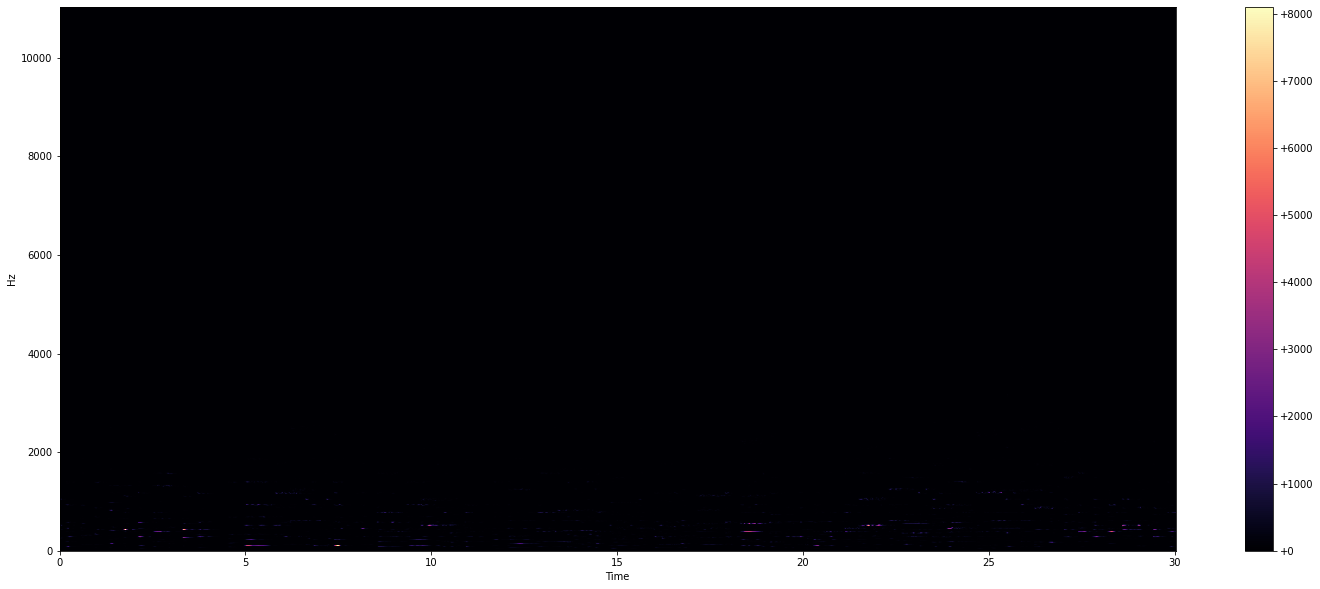

In [ ]:
Y_scale = np.abs(S_classical) ** 2

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")


plot_spectrogram(Y_scale, sr, HOP_SIZE)

####***Log-Amplitude Spectogram***

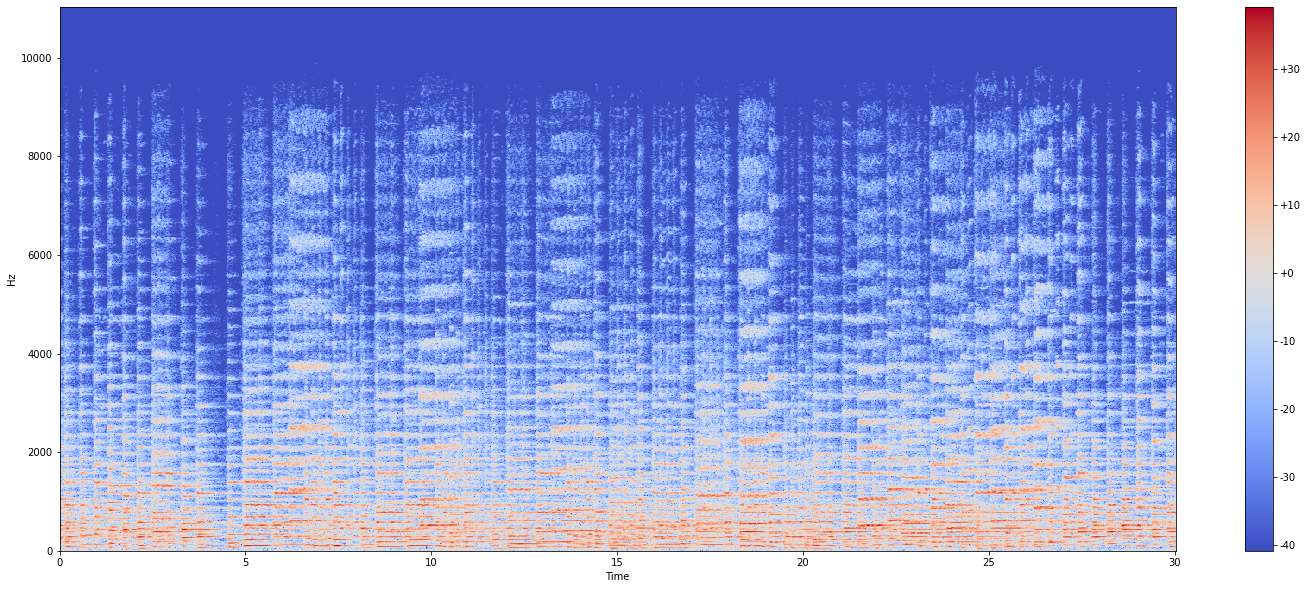

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

####***Log-Frequency Spectogram***

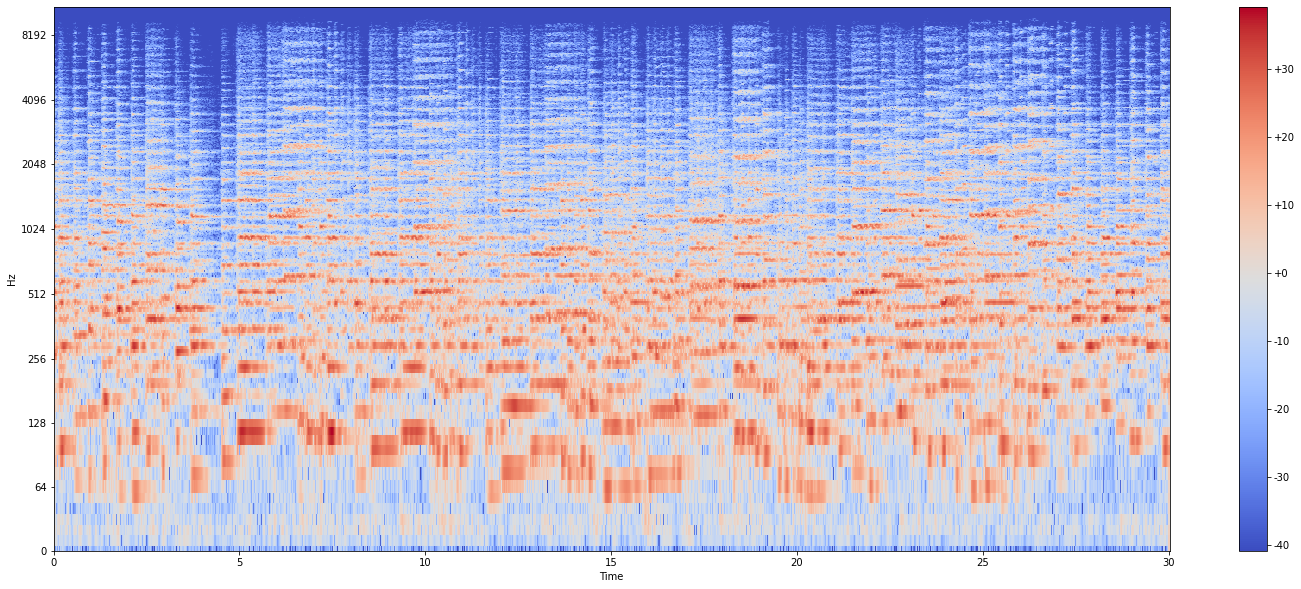

In [ ]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

####***With Librosa Log-Amplitude Spectogram***

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

librosa.display.specshow()

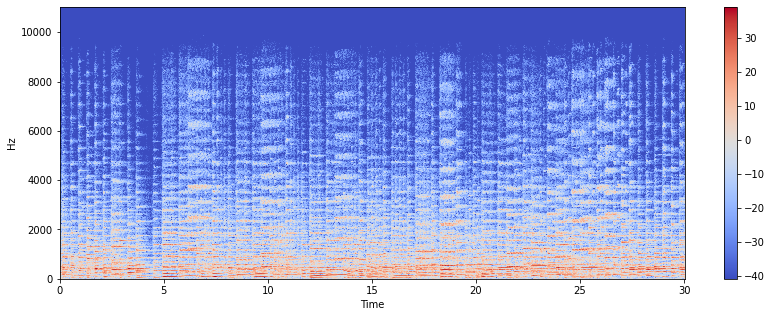

In [ ]:
S_classical = librosa.stft(classical)
Xdb = librosa.amplitude_to_db(abs(S_classical))
plt.figure(figsize=(14, 5))
plt.title("CLASSICAL")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

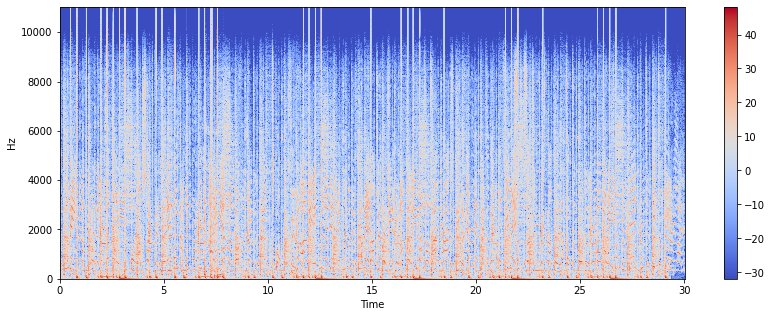

In [ ]:
S_hiphop = librosa.stft(hiphop)
Xdb = librosa.amplitude_to_db(abs(S_hiphop))
plt.figure(figsize=(14, 5))
plt.title("HIPHOP")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

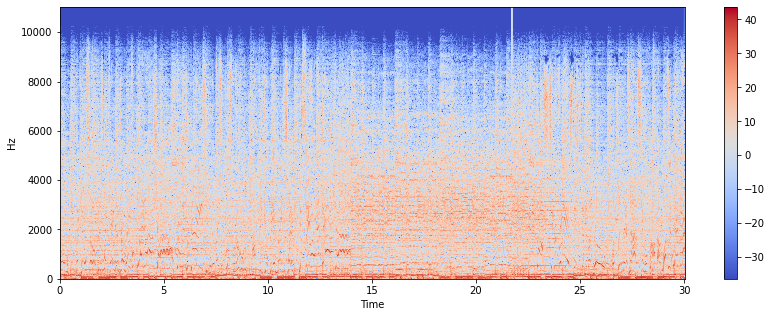

In [ ]:
S_metal = librosa.stft(metal)
Xdb = librosa.amplitude_to_db(abs(S_metal))
plt.figure(figsize=(14, 5))
plt.title("METAL")
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()